In [1]:
# March 2022

# for communication

# twitter https://twitter.com/runaz_there

# Подготовка данных

In [2]:
import pandas as pd  # для работы с датафреймом
import numpy as np  # для работы с матрицами, векторами
import matplotlib.pyplot as plt  # для графиков
import seaborn as sns  # для графиков
import re  # для регулярных выражений
import os

Data Science содержит три больших отдела:

1) получение и подготовка данных;
2) статистическая обработка данных;
3) машинное обучение. 

Статистическая обработка нацелена на:

1) описание сгруппированных данных (медиана, среднее и т.п.); 
2) описание взаимодействия между различными группами данных (корреляция и т.п.). 

Другими словами, *статистическая обработка* требует понять данные, а значит и те реальные процессы, которые стоят за данными. Это важно учитывать. В конечном счете моя задача не просто получить корреляцию, а понять данные. Что это означает? Во-первых, я должен проверять как корреляцию, так и другие статистики, на вменяемость, на соответствие действительности. Во-вторых, именно в действительности я должен искать подсказки, какие тесты применить, какие метрики получить. Так, например, понимание данных можно получить и из других источников, не только за счет применения статистических тестов. Можно сделать предположения о процессах, отраженных в данных, на основании опыта, а уже затем проверить предположения с помощью статистики. Важно помнить, что математика - это только язык, который используют, чтобы описать действительность. Не надо подменять математикой саму действительность.

*Машинное обучение* нацелено на создание алгоритма, который позволит предсказывать целевой признак на основании заданных признаков в автоматизированном режиме. Другими словами, статистическая обработка позволяет понять процессы, а машинное обучение - предсказать процессы.

Однако начинается все с предварительной подготовки данных. В самом деле, если не подготовить данные, не убрать пропуски, дубликаты и т.п., то это повлияет на качество как статистической обработки, так и машинного обучения (или даже не позволит их выполнить). В этом разделе я займусь именно подготовкой данных.

Подготовка данных включает, но не ограничивается, следующие элементы:

1) проверка правильности формирования индекса, наименования столбцов (признаков). Например, может быть обнаружено, что в наименовании столбцов есть лишние пробелы;
2) проверка типа данных. Например, численные данные могут быть отмечены как объекты или наоборот;
3) поиск дубликатов;
4) очистка строковых данных от лишних символов. Например, наличие слэша там, где это очевидно неуместно;
5) обработка значений, которые очевидно являются ошибочными. Например, в столбце с количеством страниц указан жанр книги и т.п.;
6) создание новых признаков. Например, по значениям двух уже имеющихся столбцов можно создать третий;
7) укрупнение категорий в категориальных признаках;
8) проверка на чистоту признаков. Нельзя смешивать категориальные данные и числовые в одном признаке.

*Предупреждение об источнике данных*

Источник данных находится [здесь](https://www.kaggle.com/jealousleopard/goodreadsbooks). Мне неизвестна процедура, которую применял автор для сбора данных. Поэтому всегда надо помнить, что особенности именно данного набора могут оказать влияние на выводы. Идеально было бы самостоятельно собрать данные или использовать дополнительно иные сборки данных, но пока в этой методичке такая задача не стоит. Кроме того, сайт Goodreads с конца 2020 ограничил использование API и получение данных.

Почему при таких ограничениях я выбрал именно данный набор? Как я указывал выше, прежде всего, надо основываться на действительности, чтобы понять данные. А значит я должен разбираться или хотя бы понимать те объекты, тот предмет, которого касаются данные. Так как я много читаю, полагаю, что неплохо понимаю, за что можно поставить книге ту или иную оценку, как на это влияет количество страниц и прочее. Поэтому я выбрал именно эти данные.

In [3]:
# скопирую путь к файлу из проводника Windows, но заменю \ на /
# error_bad_lines=False: если в строках есть ошибки, они будут пропущены
data = pd.read_csv(os.getcwd() + '\\books.csv', error_bad_lines=False)  

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [4]:
# смотрю данные
data.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


Вижу, что данные можно разбить на две категории: 

1) сведения о книге (название, автор, isbn, язык, количество страниц, дата публикации и издательство);
2) сведения о реакции читателей (средний рейтинг, количество отзывов, количество оценок). 

Данные рассказывают не просто про книгу и не просто про реакцию на книгу, а про реакцию читателей, измеренную конкретными признаками, на книгу, также измеренную конкретными признаками. Если у меня нет специального задания по анализу, то я могу наметить стратегию исследования по имеющимся признакам. Так, например, может быть интересно, каким книгам чаще ставят положительные оценки? как зависит оценка книги от количества страниц в ней? 

Сформулирую общую для себя цель - изучить от чего зависит оценка книги. 

Таблица задает две оси: вертикальная - наблюдения, горизонтальная - признаки. 

Метка для наблюдений - индекс, метка для признаков - название признаков (название столбцов). Поэтому, естественно, что подготовка данных должна начинаться с обследования меток. Однако индекс формируется автоматически в порядке возрастания от 0 до n (это поведение по умолчанию можно изменить). Названия столбцов были предоставлены вместе с данными, поэтому их-то отдельно и надо обследовать.

In [5]:
# смотрю названия столбцов на наличе ошибок
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
# хорошей практикой является создание копии данных 
db = data.copy()

# уберу лишние пробелы в названии столбца
db = db.rename(columns = {'  num_pages' : 'num_pages'})

In [7]:
# проверю, 
# что проблема устранена
db.columns 

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [8]:
# смотрю информацию о данных, чтобы определить тип объектов, 
# отсутствие пропусков
db.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Вижу, что есть 12 признаков (нумерация начинается с 0 и продолжается до 11) и 11123 наблюдений (строк). Пропусков нет (количество объектов по столбцам одинаковое). Индекс у нас это RangeIndex. По типам данных заметно две проблемы. **isbn** помечен как объект, а **isbn13** как int64. Кроме того, **publication_date** помечен как объект, хотя это очевидно дата. Изменю тип данных.

In [9]:
# изменю тип данных
db['isbn13'] = db['isbn13'].astype('object')

# использую errors, иначе выводится ошибка
db['publication_date'] = pd.to_datetime(db['publication_date'], errors='coerce')

In [10]:
# смотрю результат изменений
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  object        
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.0+ MB


Вижу, что в **publication_date** появилось два пропущенных значения. Так как подобных строк всего две, я могу их удалить.

In [11]:
# удалю данные с ошибочной датой
db = db.loc[~db['publication_date'].isin(['NaT'])]

Запись выше надо читать так. В таблице db выбрать только те строки, у которых в столбце "publication_date" нет значения NaT. Значок тильды ~ означает "не". Метод isin проверяет наличие указанных данных в ячейке. 

Здесь также важно, что я могу взять изначальную таблицу, отфильтровать ее, как мне это необходимо, а затем заменить изначальную таблицу отфильтрованной. Другими словами, изначально у меня была таблица db, после изменений я получаю таблицу с тем же названием db, но уже отфильтрованную.

In [12]:
# смотрю результат изменений
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11121 non-null  int64         
 1   title               11121 non-null  object        
 2   authors             11121 non-null  object        
 3   average_rating      11121 non-null  float64       
 4   isbn                11121 non-null  object        
 5   isbn13              11121 non-null  object        
 6   language_code       11121 non-null  object        
 7   num_pages           11121 non-null  int64         
 8   ratings_count       11121 non-null  int64         
 9   text_reviews_count  11121 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11121 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.1+ MB


Теперь я должен заняться дубликатами строк. Я могу искать либо полные дубликаты (данные в каждом столбце для строки полностью совпадают), либо искать дубликаты выборочно. Здесь надо обратить внимание, что **isbn** является уникальным идентификатором каждой изданной книги. Поэтому логично искать дубликаты только по этому признаку, так как книги вполне могут совпадать по иным признакам и это нормально. 

In [13]:
# поиск дубликатов
db.duplicated(subset=['isbn13']).sum()

0

Дубликатов по **isbn13** нет. Но все-таки посмотрю дубликаты по названию и имени автора.

In [14]:
# cтроки, которые являются дубликатами 
# первая строка, с которой сравниваются эти, не показана
db[db.duplicated(subset=['title', 'authors', 'publication_date', 'publisher'])].head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
3147,11557,Swan Song,Robert R. McCammon,4.28,0671741039,9780671741037,eng,956,46244,2540,1987-06-01,Pocket Books
3487,12683,The Shining,Stephen King/Campbell Scott,4.22,0743536991,9780743536998,eng,0,13,0,2005-08-02,Simon & Schuster Audio
5298,19135,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536959,9780743536950,en-US,0,56,5,2004-01-19,Simon & Schuster Audio


Такой подход позволяет понять, почему могут совпадать имя автора и название при различных **isbn**. Вижу, что, как правило, такие дубликаты - это аудиокниги. С этим придется разобраться отдельно. Для начала посмотрю, есть ли нулевое количество страниц у книг. 

In [15]:
# количество книги с 0 страниц
db[db['num_pages'] == 0].count()

bookID                76
title                 76
authors               76
average_rating        76
isbn                  76
isbn13                76
language_code         76
num_pages             76
ratings_count         76
text_reviews_count    76
publication_date      76
publisher             76
dtype: int64

Таких книг 76. Что их объединяет? Посмотрю издательства. 

In [16]:
# количество книг по издательствам
# показаны только первые пять 
db[db['num_pages'] == 0]['publisher'].value_counts().head(5)

Random House Audio               19
Simon & Schuster Audio            5
Tantor Media                      5
Random House Value Publishing     4
Macmillan Audio                   4
Name: publisher, dtype: int64

Вижу, что в основном это издательства, которые выпускают аудиокниги. Это логично. Если у книги нет страниц, то это просто аудиокнига. Но посмотрим количество страниц для тех книг, которые выпускали эти издательства.

*Заметка о коде* 

Код выше весьма любопытен. Как его прочитать? Берем таблицу db. В этой таблице ищем такие строки, в которых столбец равен 0. Далее, в отфильтрованной таким образом таблице, берем столбец 'publisher'. После этого вызываем value_counts для подсчета количества и head для ограничения вывода результатов.

In [17]:
# перевожу все буквы в названии в нижний регистр
# затем ищу совпадение, показаны первые 5 результатов
db[db['publisher'].str.lower().str.contains('audio')]['num_pages'].sort_values(ascending=False).head(5)

7511    1162
5845     473
5849     447
2102     368
4841     356
Name: num_pages, dtype: int64

Вижу, что аудиоиздательства издают нечто, что имеет страницы, даже 1162 страницы! Посмотрю на это.

*Заметка о коде*

Код выше очень похож на предыдущий и может быть аналогично прочитан. Однако обращает внимание, что при первоначальной фильтрации таблицы я могу добавить дополнительные методы, например str и т.п.

In [18]:
db[db['num_pages'] == 1162]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
7511,28845,The Story of Philosophy,Will Durant/Grover Gardner,4.12,1572704209,9781572704206,eng,1162,31,4,2004-09-20,AudioGO


В интернете, например на сайте Amazon, можно обнаружить эту книгу. И это оказывается аудиокнигой! Таким образом, количество "страниц" еще не говорит нам, что это бумажная книга. Это может быть, например, вес дисков. Более верный признак - это именно издательство. Как же поступить? Ведь сравнить книги аудио и бумажные по количеству страниц не получится. Следовательно, в одном признаке смешаны различные числа - количество страниц и вес дисков. Удалю все аудиокниги, но сначала сравню оценки по бумажным и аудиокнигам.

Text(0.5, 1.0, 'Средняя оценка для бумажных и аудиокниг')

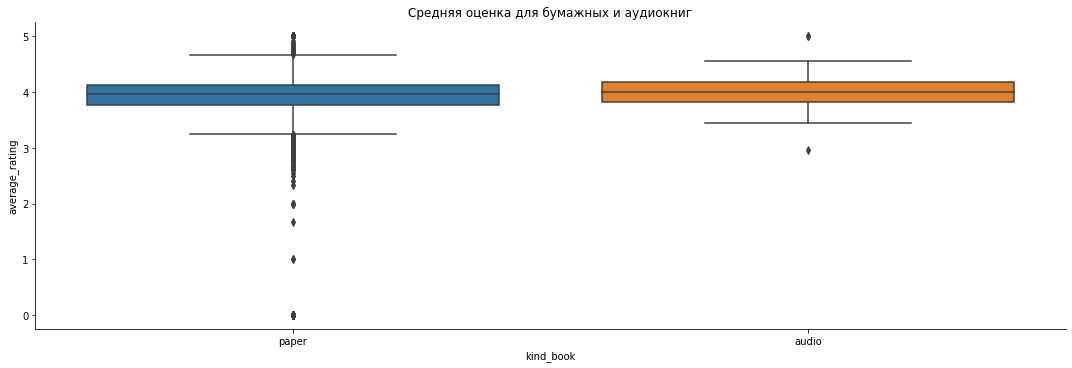

In [19]:
db['kind_book'] = np.where(db['publisher'].str.lower().str.contains('audio'), 'audio', 'paper')
g = sns.catplot(data=db, x='kind_book', y='average_rating', kind='box', aspect=3)
plt.title('Средняя оценка для бумажных и аудиокниг')

Вижу, что медиана не отличается, хотя разброс оценок для бумажных книг больше, чем для аудиокниг. Удалю вспомогательный признак, а также все аудиокниги. Надо учитывать, что такой подход, когда сравниваются две категории книг по графикам, является довольно грубым. Здесь бы стоило применить, например, t-тест. Но у меня нет специальной задачи исследовать аудио и бумажные книги, поэтому ограничусь графиками.

*Заметка к коду*

Как прочитать np.where? Здесь я беру исходные данные признака, нахожу один из них, например названия с "audio", и присваиваю значение "audio", а если это не выполняет, то присваиваю значение "paper".

In [20]:
db = db.drop('kind_book', axis=1)
db = db[~db['publisher'].str.lower().str.contains('audio')]
db.head(3) 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic


Еще раз посмотрю на таблицу, но выберу только количество страниц до 10. Посмотрю издательства.

In [21]:
db[db['num_pages'] < 10]['publisher'].value_counts().head(3)

Tantor Media                6
Caedmon                     6
Grand Central Publishing    5
Name: publisher, dtype: int64

Если изучить полный список, то можно заметить, что там есть издательства Listening Library и ряд других, которые очевидно выпускают аудиокниги. Прихожу к выводу, что книги с количеством страниц 10 - это аудиокниги. Удалю их.

In [22]:
db = db[db['num_pages'] > 10]

Добавлю два дополнительных признака в таблицу: 

1) десятилетие, в котором вышла книга, 
2) квартал, в котором вышла книга. 

Это называется конструированием признаков, исходя из целей исследования. Специальных целей передо мной не ставили, я ищу их для себя сам. Меня будет интересовать, как распределяются книги по десятилетиям и в какой квартал их чаще выпускают. Почему именно эти признаки? Потому что десятилетия отражают развитие рынка книготорговли, изменение форматов и т.п. Кварталы же зависят от праздников, сезонности, что также может оказывать влияние на оценку книги.

Конструирование признаков возможно двумя путями: 

1) самостоятельно определить новый признак, 
2) признак создается автоматически, например простым возведением каждого числового признака в квадрат или перемножением каждой пары таких признаков. 

Если затруднительно самостоятельно определить признаки, которые было бы интересно изучить, то можно применить второй метод. В этом случае можно и не создавать признаки на этапе обработки данных, можно использовать специальные методы, например полиномиальную регрессию. 

In [23]:
db.loc[ : , "decade"] = 10 * (db.loc[ : , "publication_date"].dt.year // 10)
db.loc[ : , 'quarter'] = db.loc[ : , 'publication_date'].dt.quarter 
db.head(3) 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4


Теперь посмотрю на признак authors. Вижу, что здесь есть случаи, когда указано несколько имен через /. Сколько таких случаев?

*Заметка к коду*

Чтобы получить значение десятилетия, я использовал код 10 * (db.loc[ : , "publication_date"].dt.year // 10). Почему? В этом коде я сначала делю год на 10, причем оставляю только целую часть. Например, если год 2001, то получаю 200. А затем уже умножаю на 10 это "целое" число, что и дает декаду.

In [24]:
db[db['authors'].str.contains('/')].head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2


Из примеров видно, что, как правило, через слеш указаны переводчики. Однако возможны и другие ситуации. Это могут быть соавторы или вариант написания имени. Без дополнительного исследования внешних источников этого определить нельзя. В этой ситуации можно сделать следующее. Заменю слеш на запятую. Создам колонку tra_co (переводчик или соавтор) и присвою 1 тем случаям, где есть запятая, и 0 остальным.

In [25]:
db['authors'] = db['authors'].str.replace('/', ',')
db['tra_co'] = np.where(db['authors'].str.contains(','), 1, 0)
db.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3,1
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4,0


Теперь разберусь с книгами, у которых слишком большие значения количества страниц. Посмотрю на них поближе.

In [26]:
db[db['num_pages'] > 1000].head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,2005-09-12,Scholastic,2000,3,0
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,2012-09-25,Ballantine Books,2010,3,0


Как правило, книги с количеством страниц больше 1000 - это многотомные издания. Очевидно, что просто убрать такие книги, как я сделал с книгами, у которых было 0 страниц, нельзя. Что же тогда? Я должен найти все такие книги и пометить их. Для этого надо определить маркеры, которые позволят найти многотомные издания. Уже представленный выше список дает идеи:

1) книги с наличием знака #
2) книги со словами Boxed Set

Кроме того, под подозрением все книги со словами "books", "vol.", "volume", "series". 

См. хорошее руководство по регулярным выражениям [здесь](https://developers.google.com/edu/python/regular-expressions).

In [27]:
db['multivolume'] = np.where(
    db['title'].str.contains('#|boxed|books|volume|series|vol.', flags=re.IGNORECASE), 1, 0
    )

db.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co,multivolume
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3,1,1
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3,1,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4,0,1


In [28]:
# статистическое описание оценок
db['average_rating'].describe()

count    10862.000000
mean         3.933448
std          0.348318
min          0.000000
25%          3.770000
50%          3.960000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64

Минимальная оценка это 0. Но на сайте нельзя поставить такую оценку. Поэтому 0 означает отсутствие оценки, то есть это категориальный признак, который "пробрался" в числовой. Посмотрю количество и удалю, так как такое смешение недопустимо. Однако, если оценка 0, но количество оценок не 0, то это просто ошибка. Проверю это.

In [29]:
db[(db['average_rating'] == 0) & (db['ratings_count'] > 0)].sum()

bookID                0.0
title                 0.0
authors               0.0
average_rating        0.0
isbn                  0.0
isbn13                0.0
language_code         0.0
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
publisher             0.0
decade                0.0
quarter               0.0
tra_co                0.0
multivolume           0.0
dtype: float64

In [30]:
db[db['average_rating'] == 0]['average_rating'].count()

24

In [31]:
db = db[db['average_rating'] != 0]

In [32]:
# проверю минимальное значение
db['average_rating'].min() 

1.0

In [33]:
# удалю признаки, которые больше не пригодятся
db = db.drop(['bookID', 'isbn', 'isbn13', 'authors', 'publication_date', 'publisher'], axis=1) 

Удалю редкие категории. Для этого можно применить следующий код к каждой категориальной переменной.

In [34]:
db['decade'].value_counts().head(3)

2000    7332
1990    2436
1980     610
Name: decade, dtype: int64

Здесь не привожу вывод по каждой категории. Однако общий вывод такой: редкие категории встречаются в **decade**, поэтому объединю все года, у которых менее 20 значений в год 1940. 

Почему необходимо укрупнений категорий? Потому что маленькие категории несут мало информации, в тоже время увеличение размерности данных ведет к тому, что известно как "проклятие размерности". 

In [35]:
db['decade'] = db['decade'].replace([1900, 1930, 2020, 1920, 1910], 1940)

In [36]:
# укажу index=False, чтобы при сохранении не был создан 
# дублирующий индекс
db.to_csv('gd_clean_data.csv', index=False) 

In [37]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 11122
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10838 non-null  object 
 1   average_rating      10838 non-null  float64
 2   language_code       10838 non-null  object 
 3   num_pages           10838 non-null  int64  
 4   ratings_count       10838 non-null  int64  
 5   text_reviews_count  10838 non-null  int64  
 6   decade              10838 non-null  int64  
 7   quarter             10838 non-null  int64  
 8   tra_co              10838 non-null  int32  
 9   multivolume         10838 non-null  int32  
dtypes: float64(1), int32(2), int64(5), object(2)
memory usage: 846.7+ KB


# Приложение 1

**Рекомендуемая литература:**

1) Engineering statistics handbook https://www.itl.nist.gov/div898/handbook/eda/eda.htm

**Полезные ссылки:**

1) руководство по применению регулярных выражений [здесь](https://developers.google.com/edu/python/regular-expressions);
2) еще одно руководство по регулярным выражениям от проекта [Dataquest](https://www.dataquest.io/blog/regular-expressions-data-scientists/)
3) и еще немного про регулярные выражения от [Towards Data Science](https://towardsdatascience.com/easiest-way-to-remember-regular-expressions-regex-178ba518bebd)
3) математическая энциклопедия от проекта [Wolfram](https://mathworld.wolfram.com/)

**Ссылки на мои ресурсы:**

1) Twitter https://twitter.com/runaz_there
2) GitHub https://github.com/Ruslan-Nazarov
3) AI for everyone (Medium) https://medium.com/ai-for-everyone
4) LinkedIn https://www.linkedin.com/in/ruslan-nazarov-223003198/
5) email runaz2007@gmail.com OR runaz@protonmail.com


*В будущих редакциях методички*

1) будет более подробно рассмотрено, каким образом, из каких источников можно получить данные бесплатно.
